Found on Github : https://github.com/yhat/DataGotham2013/

In [ ]:
things = ["First Name", "Last Name"]

def snakify(txt):
    "return string in snake_case"
    return txt.replace(" ", "_").lower()

print [snakify(thing) for thing in things]

In [ ]:
snakify("My Name is Charles")

my directory

In [ ]:
pwd

My files in this directory

In [ ]:
ls

In [ ]:
foo = ! echo hello, world
foo

### use curl to download data

In [ ]:
!curl http://www.justinmrao.com/salary_data.csv >> ./salary_data.csv

In [ ]:
import pylab as pl
X = range(10)
Y = range(11,21)
pl.scatter(X,Y, c= 'r')
pl.show()
print

### write and run in other langugaes

In [ ]:
%%javascript

function say_hi( ) {
    alert("Hellow World");
}

say_hi()
console.log("Welcome!")

In [ ]:
# read images via url
from IPython.display import Image
Image("http://ipython.org/_static/IPy_header.png")

## Numpy

In [ ]:
import numpy as np

def list_times(alist, scalar):
    for i, val in enumerate(alist):
        alist[i] = val * scalar
    return alist

In [ ]:
arr = np.arange(1e7)
l = arr.tolist()

In [ ]:
%timeit arr * 1.1

In [ ]:
%timeit list_times(l, 1.1)

In [ ]:
print "len(l)", len(l)
print "len(arr)", len(arr)

In [ ]:
# advanced slicing with ndarray
l = [[1,2] , [3,4]]
arr = np.array(l)

print "Value in Row One, COlumn ONe: %d" % l[0][0]
print "Value in Row One, COlumn ONe: %d" % arr[0,0]
print "Value in All Rows, COlumn Two: %s" %  str(arr[::,1])
print "Value in Row Two, Both Columns: %s" % str(arr[1::,])

In [ ]:
zero_to_1000 = np.arange(0,1000)
zero_to_1000 = zero_to_1000.reshape((500,2)) # reshape into 2 dimensions 500 x 2 
zero_to_1000[:100, 1] # select 2 column top 100

In [ ]:
# boolean indexing for selection
numbers = np.random.uniform(size=100)
numbers = numbers.reshape((50,2))
mask = (numbers >= 0.7) & (numbers <= 0.9)
mask[:10]

In [ ]:
numbers[mask, ] # pass the boolean mask to the array using sub notation

# SciPy

In [ ]:
import pylab as pl
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
x = np.linspace(start = 0, stop = 2*np.pi, num  = 50)
y1 = np.sin(x)
y2 = np.cos(x)

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(x, y1, label='sin')
ax.plot(x, y2, label='cos')

ax.legend(fontsize=16)
ax.axes.xaxis.set_label_text("X Axis", fontdict={"size":22})
ax.axes.yaxis.set_label_text("y Axis", fontdict={"size":22})
ax.title.set_text("This is a graph\n")
ax.title.set_fontsize(28)
fig.show()
print

In [ ]:
# histograms
from scipy import randn

d = randn(100) * 100
m = d.mean()
s = d.std()
m_y = 1.5

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
ax.hist(d, 15)
ax.plot(m, m_y, "ko")
ax.plot([m - s, m + s], [m_y] * 2, "k--");
ax.title.set_text("Histogram with Mean and 2 SDs")
ax.title.set_fontsize(28)

In [ ]:
# multiple plotts
x = np.arange(0,100)
y = np.random.rand(100)
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2,2,figsize = (10,10))
ax1.plot(x,y)
ax2.hist(y)
ax3.scatter(x,y)
ax4.boxplot(y)
pl.show()

# Pandas

In [ ]:
import pandas as pd
df = pd.DataFrame({"A" : range(10), "B" : np.random.random(size=10)})
df.B.corr(df.A)

# SciKit Learn

In [ ]:
# %load http://scikit-learn.org/stable/_downloads/plot_lena_ward_segmentation.py
"""
===============================================================
A demo of structured Ward hierarchical clustering on Lena image
===============================================================

Compute the segmentation of a 2D image with Ward hierarchical
clustering. The clustering is spatially constrained in order
for each segmented region to be in one piece.
"""

# Author : Vincent Michel, 2010
#          Alexandre Gramfort, 2011
# License: BSD 3 clause

print(__doc__)

import time as time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

###############################################################################
# Generate data
lena = sp.misc.lena()
# Downsample the image by a factor of 4
lena = lena[::2, ::2] + lena[1::2, ::2] + lena[::2, 1::2] + lena[1::2, 1::2]
X = np.reshape(lena, (-1, 1))

###############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*lena.shape)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)
label = np.reshape(ward.labels_, lena.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

###############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(lena, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

# StatModels

In [ ]:
# %load https://gist.github.com/glamp/6536064/raw/57146ac3406f7541d944264ed9aa85dad6e085a1/statsmodels_example.py
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
 
# read the data in
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
 
# rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()
#    prestige_1  prestige_2  prestige_3  prestige_4
# 0           0           0           1           0
# 1           0           0           1           0
# 2           1           0           0           0
# 3           0           0           0           1
# 4           0           0           0           1
 
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

# manually add the intercept
data['intercept'] = 1.0

train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
 
logit = sm.Logit(data['admit'], data[train_cols])
 
# fit the model
result = logit.fit()

print result.summary()

# Python For DATA SCIENCE

In [ ]:
import pandas as pd
df = pd.read_csv("data\cs-training.csv")

In [ ]:
df.head()

In [ ]:
df.SeriousDlqin2yrs.mean()

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import re

In [ ]:
np.sum

In [ ]:
?pd.read_csv

In [ ]:
! head -n 2 data/cs-training.csv

In [ ]:
df.dtypes

In [ ]:
df.head(1)

In [ ]:
df.groupby('SeriousDlqin2yrs').size()

In [ ]:
df.describe()

In [ ]:
df.age.describe(percentile_width=25)

In [ ]:
df.NumberOfDependents.unique()

In [ ]:
df.NumberOfDependents.nunique()

In [ ]:
pd.value_counts(df.NumberOfDependents)

In [ ]:
df.NumberOfDependents.value_counts(ascending=True)

In [ ]:
%matplotlib inline

In [ ]:


import seaborn as sns

pd.value_counts(df.NumberOfDependents).plot(kind = 'bar')

In [ ]:
pd.crosstab(df.NumberOfDependents, df.SeriousDlqin2yrs)

In [ ]:

# convert values to snake case

def camel_to_snake(column_name):
    """
    converts a string that is camelCase into snake_case
    """
    s1 = re.sub('{.}([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [ ]:
camel_to_snake("AntsNeedToDie")

In [ ]:
df.columns = [camel_to_snake(col) for col in df.columns]
df.columns.tolist()

In [ ]:
want = ['monthly_income', 'serious_dlqin2yrs']
df[want].head()

In [ ]:
df['one'] = 1

In [ ]:
del df['one']

In [ ]:
gt_5k = df[df.monthly_income > 5000]
print len(gt_5k) , "people with monthly_income > 5000"
df[df.monthly_income > 5000].head()

In [ ]:
df.ix[40:45, 0 :2]

In [ ]:
mask = (df.monthly_income > 5000) & (df.serious_dlqin2yrs == 1)
df[mask].head()

In [ ]:
mask = (df.age >= 35) & (df.serious_dlqin2yrs == 0) & (df.number_of_open_credit_lines_and_loans < 10)
print len(df[mask]) == 76151

In [ ]:
mask = (df.serious_dlqin2yrs == 0) & (df.monthly_income == df.monthly_income.quantile(0.90) )
len(df[mask])

In [ ]:
df_lng = pd.melt(df)
df_lng.head()

In [ ]:
null_variables  = df_lng.value.isnull()
null_variables.sum()

In [ ]:
pd.crosstab(df_lng.variable, null_variables)

In [ ]:
def print_null_freq(df) :
    """
calcualtes how many vlaues for each variable are null
    """
    df_lng = pd.melt(df)
    null_variables = df_lng.value.isnull()
    return pd.crosstab(df_lng.variable, null_variables)

print_null_freq(df)

In [ ]:
melted = pd.melt(df, id_vars = 'serious_dlqin2yrs', value_vars = ['age','debt_ratio'])

print len(melted) == 300000
print melted.variable.unique() == np.array(['age','debt_ratio'])

In [ ]:
# fill missing values
df.number_of_dependents = df.number_of_dependents.fillna(0)

print_null_freq(df)

In [ ]:
df.monthly_income.describe()

In [ ]:
# split into training and test
is_test = np.random.uniform(0, 1, len(df)) > 0.75
train = df[is_test == False]
test = df[is_test == True]

In [ ]:
len(train), len(test)

# Calibrate Imputation with Training Set

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

income_imputer = KNeighborsRegressor(n_neighbors = 1)

# train on data without nulls to predict what nulls will look like
train_w_monthly_income = train[ train.monthly_income.isnull() == False]
train_w_null_monthly_income = train[train.monthly_income.isnull() == True]

In [ ]:
train_w_monthly_income.corr()

In [ ]:
train_w_monthly_income.corr().ix[:,5]

In [ ]:
cols = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']
income_imputer.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

## Replace Missing Values

In [ ]:
new_values = income_imputer.predict(train_w_null_monthly_income[cols])

In [ ]:
train_w_null_monthly_income['monthly_income'] = new_values
new_values

In [ ]:
train = train_w_monthly_income.append(train_w_null_monthly_income)
len(train)

In [ ]:
test['monthly_income_imputed'] = income_imputer.predict(test[cols])
test.head()

In [ ]:
test['monthly_income'] = np.where(test.monthly_income.isnull(), test.monthly_income_imputed, test.monthly_income)

In [ ]:
print pd.value_counts(train.monthly_income.isnull())
print pd.value_counts(test.monthly_income.isnull())

# Try RF Imputing With Income?

In [ ]:
train.to_csv("data\creditscore_train.csv")
test.to_csv("data\creditscore_test.csv")

## Aggregation and Grouping

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl

In [ ]:
df = pd.read_csv("data\cs-training.csv")

In [ ]:
df.MonthlyIncome.apply(np.log)[0:10]

In [ ]:
add_10 = lambda x : x + 10
plus = lambda x, y: x + y

print add_10(9)
print plus(10, 20)

In [ ]:
df.MonthlyIncome.apply(lambda x : np.log(x + 1))[0:10]

In [ ]:
# using a custom function in place of lambda
def inverse(x) :
    return 1 / (x + 1)

df.MonthlyIncome.apply(inverse)[0:10]

In [ ]:
# createcap value for debt ratio
def cap_value(x, cap):
    """
    x - a value
    cap - thredhold value for x: if x > cap, then x is set to cap
    """
    if x > cap :
        return cap
    else :
        return x  

In [ ]:
print cap_value(1000, 10) == 10
print cap_value(10, 100) == 10
print df.DebtRatio.apply(lambda x : cap_value(x, 5.0)).mean()

In [ ]:
# split applly combine
subset = df[[ 'SeriousDlqin2yrs', 'age', 'MonthlyIncome']]

In [ ]:
subset.groupby( 'SeriousDlqin2yrs')

In [ ]:
subset.groupby( 'SeriousDlqin2yrs').mean()

In [ ]:
import pandas as pd
from pandas_ply import install_ply, X, sym_call

In [ ]:
(df
  .groupby(['SeriousDlqin2yrs'])
  .ply_select(
    avg_age = X.age.mean(),
    avg_inc = X.MonthlyIncome.mean()))

In [ ]:
# here is the old-school pandas equivalent
for name, group in subset.groupby('SeriousDlqin2yrs') :
    print "splitting by : ", name
    print group.mean()
    print "*"*80

In [ ]:
# groupb to calcualte percent of customer that went bad for each age
(df
 .groupby('age')
 .ply_select(delq = X.SeriousDlqin2yrs.mean())
 .sort("delq", ascending = False)
 .head()
)

In [ ]:
# group by multiple functions
subset.groupby("SeriousDlqin2yrs").agg([np.min, np.mean, np.median, np.max])

In [ ]:
# create a custom apply function
def age_x_income(frame):
    x = (frame.age * frame.MonthlyIncome)
    return np.mean(x)

In [ ]:
subset.groupby("SeriousDlqin2yrs").apply(age_x_income)

## Feature Selection

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv("data\creditscore_train.csv")
test = pd.read_csv("data\creditscore_test.csv")

train['tr_flag'] = True
test['tr_flag'] = False

df = pd.concat([train, test])

In [ ]:
# finding importnat features wiht RF 
from sklearn.ensemble import RandomForestClassifier

features = np.array(['revolving_utilization_of_unsecured_lines',
                     'age', 'number_of_time30-59_days_past_due_not_worse',
                     'debt_ratio', 'monthly_income','number_of_open_credit_lines_and_loans', 
                     'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
                     'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'])

In [ ]:
clf = RandomForestClassifier(compute_importances=True)
clf.fit(df[features], df['serious_dlqin2yrs'])

In [ ]:
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

In [ ]:
padding = np.arange(len(features)) + 0.5
pl.barh(padding, importances[sorted_idx], align='center')
pl.yticks(padding, features[sorted_idx])
pl.xlabel("Relative Importance")
pl.title("Variable Importance")
pl.show()

## Feature Enginerring

In [ ]:
df['income_bins'] = pd.cut(df.monthly_income, bins = 15)
pd.value_counts(df['income_bins'])

In [ ]:
# buckleting contious variables
def cap_values(x, cap):
    if x > cap:
        return cap
    else :
        return x
    
df.monthly_income = df.monthly_income.apply(lambda x : cap_values(x, 15000))

In [ ]:
df.monthly_income.describe()

In [ ]:
df['income_bins'] = pd.cut(df.monthly_income, bins = 15, labels = False)
pd.value_counts(df.income_bins)

In [ ]:
df[['income_bins', 'serious_dlqin2yrs']].groupby('income_bins').mean()

In [ ]:
cols = ["income_bins", "serious_dlqin2yrs"]
df[cols].groupby("income_bins").mean().plot()

In [ ]:
cols = ['age', 'serious_dlqin2yrs']
age_means = df[cols].groupby('age').mean()
age_means.plot()

In [ ]:
mybins = [0] + range(20,80,5) + [120]
df['age_bucket'] = pd.cut(df.age, bins=mybins)
pd.value_counts(df['age_bucket'])

In [ ]:
df[['age_bucket', 'serious_dlqin2yrs']].groupby('age_bucket').mean().plot()

In [ ]:
labels, levels = pd.factorize(df.age_bucket)
df.age_bucket = labels

In [ ]:
bins = []

for q in [0.2, 0.4, 0.6, 0.8, 1.0] :
    bins.append(df.debt_ratio.quantile(q))

In [ ]:
debt_ratio_binned = pd.cut(df.debt_ratio, bins= bins)
print pd.value_counts(debt_ratio_binned)

## Scaling The DAta

In [ ]:
from sklearn.preprocessing import StandardScaler

df['monthly_income_scaled'] = StandardScaler().fit_transform(df.monthly_income)

In [ ]:
print df.monthly_income_scaled.describe()

print "Mean at 0?", round(df.monthly_income_scaled.mean(), 10) == 0

#pl.hist(df.monthly_income_scaled)

In [ ]:
# rerunning feature importance
features = np.array(['revolving_utilization_of_unsecured_lines',
                     'age', 'number_of_time30-59_days_past_due_not_worse',
                     'debt_ratio', 'monthly_income','number_of_open_credit_lines_and_loans', 
                     'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
                     'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents',
                     'income_bins', 'age_bucket', 'monthly_income_scaled', 'log_lines'])

clf = RandomForestClassifier(compute_importances=True)
clf.fit(df[features], df['serious_dlqin2yrs'])

importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) + 0.5
pl.barh(padding, importances[sorted_idx], align='center')
pl.yticks(padding, features[sorted_idx])
pl.xlabel("Relative Importance")
pl.title("Variable Importance")
pl.show()

In [ ]:
best_features = features[sorted_idx][::-1]
best_features

In [31]:
# taking natrual log to impore feature

df['log_lines'] = np.log(df.revolving_utilization_of_unsecured_lines + 1)

NameError: name 'df' is not defined

## Fitting an Evaluting Your Model

In [ ]:
test.head()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [11]:
features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'monthly_income', 'age', 'number_of_times90_days_late']

In [12]:
clf = KNeighborsClassifier(n_neighbors=13, warn_on_equidistant = False)

C:\Users\Home\Anaconda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: The warn_on_equidistant parameter is deprecated and will be removed in 0.16.
  if __name__ == '__main__':


In [13]:
clf.fit(train[features], train.serious_dlqin2yrs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=13, p=2, weights='uniform')

In [14]:
clf.predict(test[features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
clf.predict_proba(test[features])

array([[ 0.92307692,  0.07692308],
       [ 0.92307692,  0.07692308],
       [ 1.        ,  0.        ],
       ..., 
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ]])

In [16]:
import pylab as pl
import seaborn as sns

In [17]:
# histogram of probablities
probs = clf.predict_proba(test[features])
prob_true = probs[::,1]
pl.hist(prob_true)

(array([  3.07970000e+04,   4.68300000e+03,   1.48200000e+03,
          4.18000000e+02,   1.33000000e+02,   6.70000000e+01,
          7.00000000e+00,   4.00000000e+00,   4.00000000e+00,
          7.00000000e+00]),
 array([ 0.        ,  0.09230769,  0.18461538,  0.27692308,  0.36923077,
         0.46153846,  0.55384615,  0.64615385,  0.73846154,  0.83076923,
         0.92307692]),
 <a list of 10 Patch objects>)

In [18]:
#evaluting the model

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [19]:
preds = clf.predict_proba(test[features])
preds

array([[ 0.92307692,  0.07692308],
       [ 0.92307692,  0.07692308],
       [ 1.        ,  0.        ],
       ..., 
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ]])

In [20]:
confusion_matrix(test['serious_dlqin2yrs'], clf.predict(test[features]))

array([[35018,    14],
       [ 2542,    28]])

In [21]:
print classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0,1])

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     35032
          1       0.67      0.01      0.02      2570

avg / total       0.91      0.93      0.90     37602



In [22]:
# confusion matrix
pd.crosstab(test['serious_dlqin2yrs'], clf.predict(test[features]), rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,35018,14
1,2542,28


In [23]:
print (28 + 35018) / float(len(test))

0.932024892293


In [24]:
# plotting roc curve
def plot_roc(name, probs):
    fpr, tpr, thresholds = roc_curve(test['serious_dlqin2yrs'], probs)
    roc_auc = auc(fpr, tpr)
    pl.clf()
    pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.05])
    pl.ylim([0.0, 1.05])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title(name)
    pl.legend(loc="lower right")
    pl.show()
plot_roc("Perfect Classifier", test['serious_dlqin2yrs'])
plot_roc("Guessing", np.random.uniform(0, 1, len(test['serious_dlqin2yrs'])))

#[::,1] selects the 2nd column of the numpy array
plot_roc("KNN", preds[::,1])

In [ ]:
clf = RandomForestClassifier()
clf.fit(train[features], train.serious_dlqin2yrs)

In [ ]:
probs = clf.predict_proba(test[features])[::,1]
plot_roc("RandomForest", probs)

In [ ]:
# trying my own model on it
clf = linear_model.LogisticRegression()
clf.fit(train[features], train.serious_dlqin2yrs)

In [ ]:
probs = clf.predict_proba(test[features])[::,1]
plot_roc("SVM", probs)

In [28]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

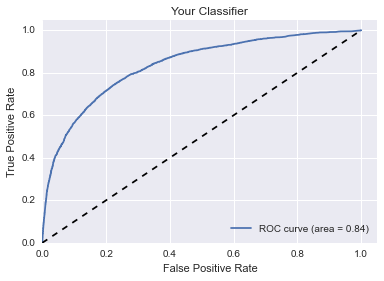

In [32]:
# using the graident bossting machine with logged lines
features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'monthly_income', 'age', 'number_of_times90_days_late']

clf = GradientBoostingClassifier()
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
plot_roc("Your Classifier", probs)

## Converting to a Credit Score

In [ ]:
probs
odds = (1 - probs) / probs
score = np.log(odds) *  (40/np.log(2)) + 340
pl.hist(score)

In [ ]:
def convert_to_prob_to_score(p):
    """
    takes probablity and converts to a score
    """
    odds  = (1- p) / p
    scores = np.log(odds) * (40/np.log(2)) + 340
    return scores.astype(np.int)

convert_to_prob_to_score(probs)

## Deploying The Model

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
train = pd.read_csv("data\creditscore_train.csv")
test = pd.read_csv("data\creditscore_test.csv")

In [3]:
from sklearn.tree import DecisionTreeClassifier

features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'monthly_income', 'age', 'number_of_times90_days_late']
clf = DecisionTreeClassifier(min_samples_leaf = 1000)
clf.fit(train[features], train.serious_dlqin2yrs)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1000, min_samples_split=2,
            random_state=None, splitter='best')

In [6]:
data = df[features]
result = {}
p = self.clf.predict_proba(data)
p = p[::, 1]
score = convert_prob_to_score(p)
result["prob"] = p
result["score"] = score


loan_model = LoanModel(clf=clf, features=features,
                 udfs=[convert_prob_to_score])

NameError: name 'BaseModel' is not defined

In [5]:
# executing the model
testcase = test.head(1).to_dict('list')
transform_result = loan_model.tranform(testcase)
loan_model.preidct(transform_result)

NameError: name 'loan_model' is not defined